Write the code needed to produce a report that provides the following information:
    1. Compare the average income based on ethnicity.
    2. On average, do married or single people have a higher balance?
    3. What is the highest income in our dataset?
    4. What is the lowest income in our dataset?
    5. How many cards do we have recorded in our dataset? Hint: use sum()
    6. How many females do we have information for vs how many males? Hint: use count().

In [90]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # The warnings module has been imported in relation to Seaborn future updates. (for the additional Pairplot graph included below)

Load Data Frame from balance.txt file saved in same folder location.

In [91]:
# Read data stored in 'balance.txt' file into a DataFrame.
df = pd.read_csv('balance.txt', sep='\s+')

Initial Analysis of the Data Frame:
It is important to have an overview and understanding of what your data frame contains. Especially to make you aware of any missing data, NaN values, the amount and names of columns, the number of rows and the types of data represented to see where any useful comparisons can be made or if any columns of data need to be formatted differently. You may also wish to remove specific rows, columns and data points (especially where there are outlier / anomalies present). Adjust naming conventions of columns and identify their position / order within the data.

In [92]:
display(df.columns) # Get columns.
display(df.index)   # Get range of indexes.
display(df.shape)   # Get number of rows and columns.
display(df.describe())  # Get an overview of the numerical aspects of the dataset.
display(df.head())  # Get an initial view of the first five observations for all columns.
display(df.tail())  # Get an initial view of the last five observations for all columns.
print("Missing Data Points:")
display(df.isnull().sum())    # Identify the number of missing data points.
print("NaN Data Points:")
display(df.isna().sum())    # Identify if this dataset contains any NaN values.

Index(['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')

RangeIndex(start=0, stop=400, step=1)

(400, 11)

,Balance,Income,Limit,Rating,Cards,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,13.429175,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000
std,5.669256,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207
min,3.749403,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000
25%,9.891439,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000
50%,11.779615,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000
75%,15.236961,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000
max,38.785123,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000


,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
395,8.764984,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian
396,9.943838,13.364,3838,296,5,65,17,Male,No,No,African American
397,14.882078,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian
398,12.001071,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian
399,10.159598,18.701,5524,415,5,64,7,Female,No,No,Asian


Missing Data Points:


Balance      0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
dtype: int64

NaN Data Points:


Balance      0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
dtype: int64

1. Compare the average income based on ethnicity.
We can see that the average income based on ethnicity is very similar in all three ethnicity groups in the dataset.
Where African Americans have a slightly higher average income (47.68), than both Asian (44.19) and Caucasian (44.52) ethnicities.

In [93]:
avg_income_ethnicity = df.groupby('Ethnicity')['Income'].mean()
print("Average income based on ethnicity:")
avg_income_ethnicity

Average income based on ethnicity:


Ethnicity
African American    47.682101
Asian               44.187833
Caucasian           44.521945
Name: Income, dtype: float64

2. On average, do married or single people have a higher balance?
On average marital status does not have an impact on an individual's balance levels.
This is represented by very similar average balances for both married (13.39) and not married (13.49)

In [94]:
avg_balance_married = df.groupby('Married')['Balance'].mean()
print("Average balance based on marital status (married or single):")
avg_balance_married

Average balance based on marital status (married or single):


Married
No     13.493509
Yes    13.388473
Name: Balance, dtype: float64

3. What is the highest income in our dataset?

In [95]:
max_income = df['Income'].max()
print("Highest income recorded in the dataset:")
max_income

Highest income recorded in the dataset:


186.634

4. What is the lowest income in our dataset?

In [96]:
min_income = df['Income'].min()
print("Lowest income recorded in the dataset:")
min_income

Lowest income recorded in the dataset:


10.354

5. How many cards do we have recorded in our dataset? Hint: use sum()

In [97]:
sum_cards = df['Cards'].sum()
print("Sum the number of cards recorded in the dataset:")
sum_cards

Sum the number of cards recorded in the dataset:


1183

6. How many females do we have information for vs how many males? Hint: use count().

In [98]:
count_gender = df['Gender'].value_counts()
print("Count of each gender male or female are there in the dataset:")
count_gender

Count of each gender male or female are there in the dataset:


Gender
Female    207
Male      193
Name: count, dtype: int64

Additional age analysis: Display max and min ages, and view all rows where age is greater than 90.

In [99]:
print("The youngest age recorded in the dataset is:", df.loc[:, "Age"].min())
print("The oldest age recorded in the dataset is:", df.loc[:, "Age"].max())
df[df.Age > 90] 

The youngest age recorded in the dataset is: 23
The oldest age recorded in the dataset is: 98


,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
209,28.14285,151.947,9156,642,2,91,11,Female,No,Yes,African American
323,33.74558,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian


Additional Pairplot Matrix using Seaborn:
Displaying useful comparisons, where we see some strong positive correlations and also applying "Student" as the 'hue' shows the spread of student / non students clearly across the graphs.
Only columns with numerical values will be represented in this pairplot, except for the "Student" value which has been included as the categorical 'hue' a value that represents distinct categories. (possible options from: Gender, Student, Married, Ethnicity)

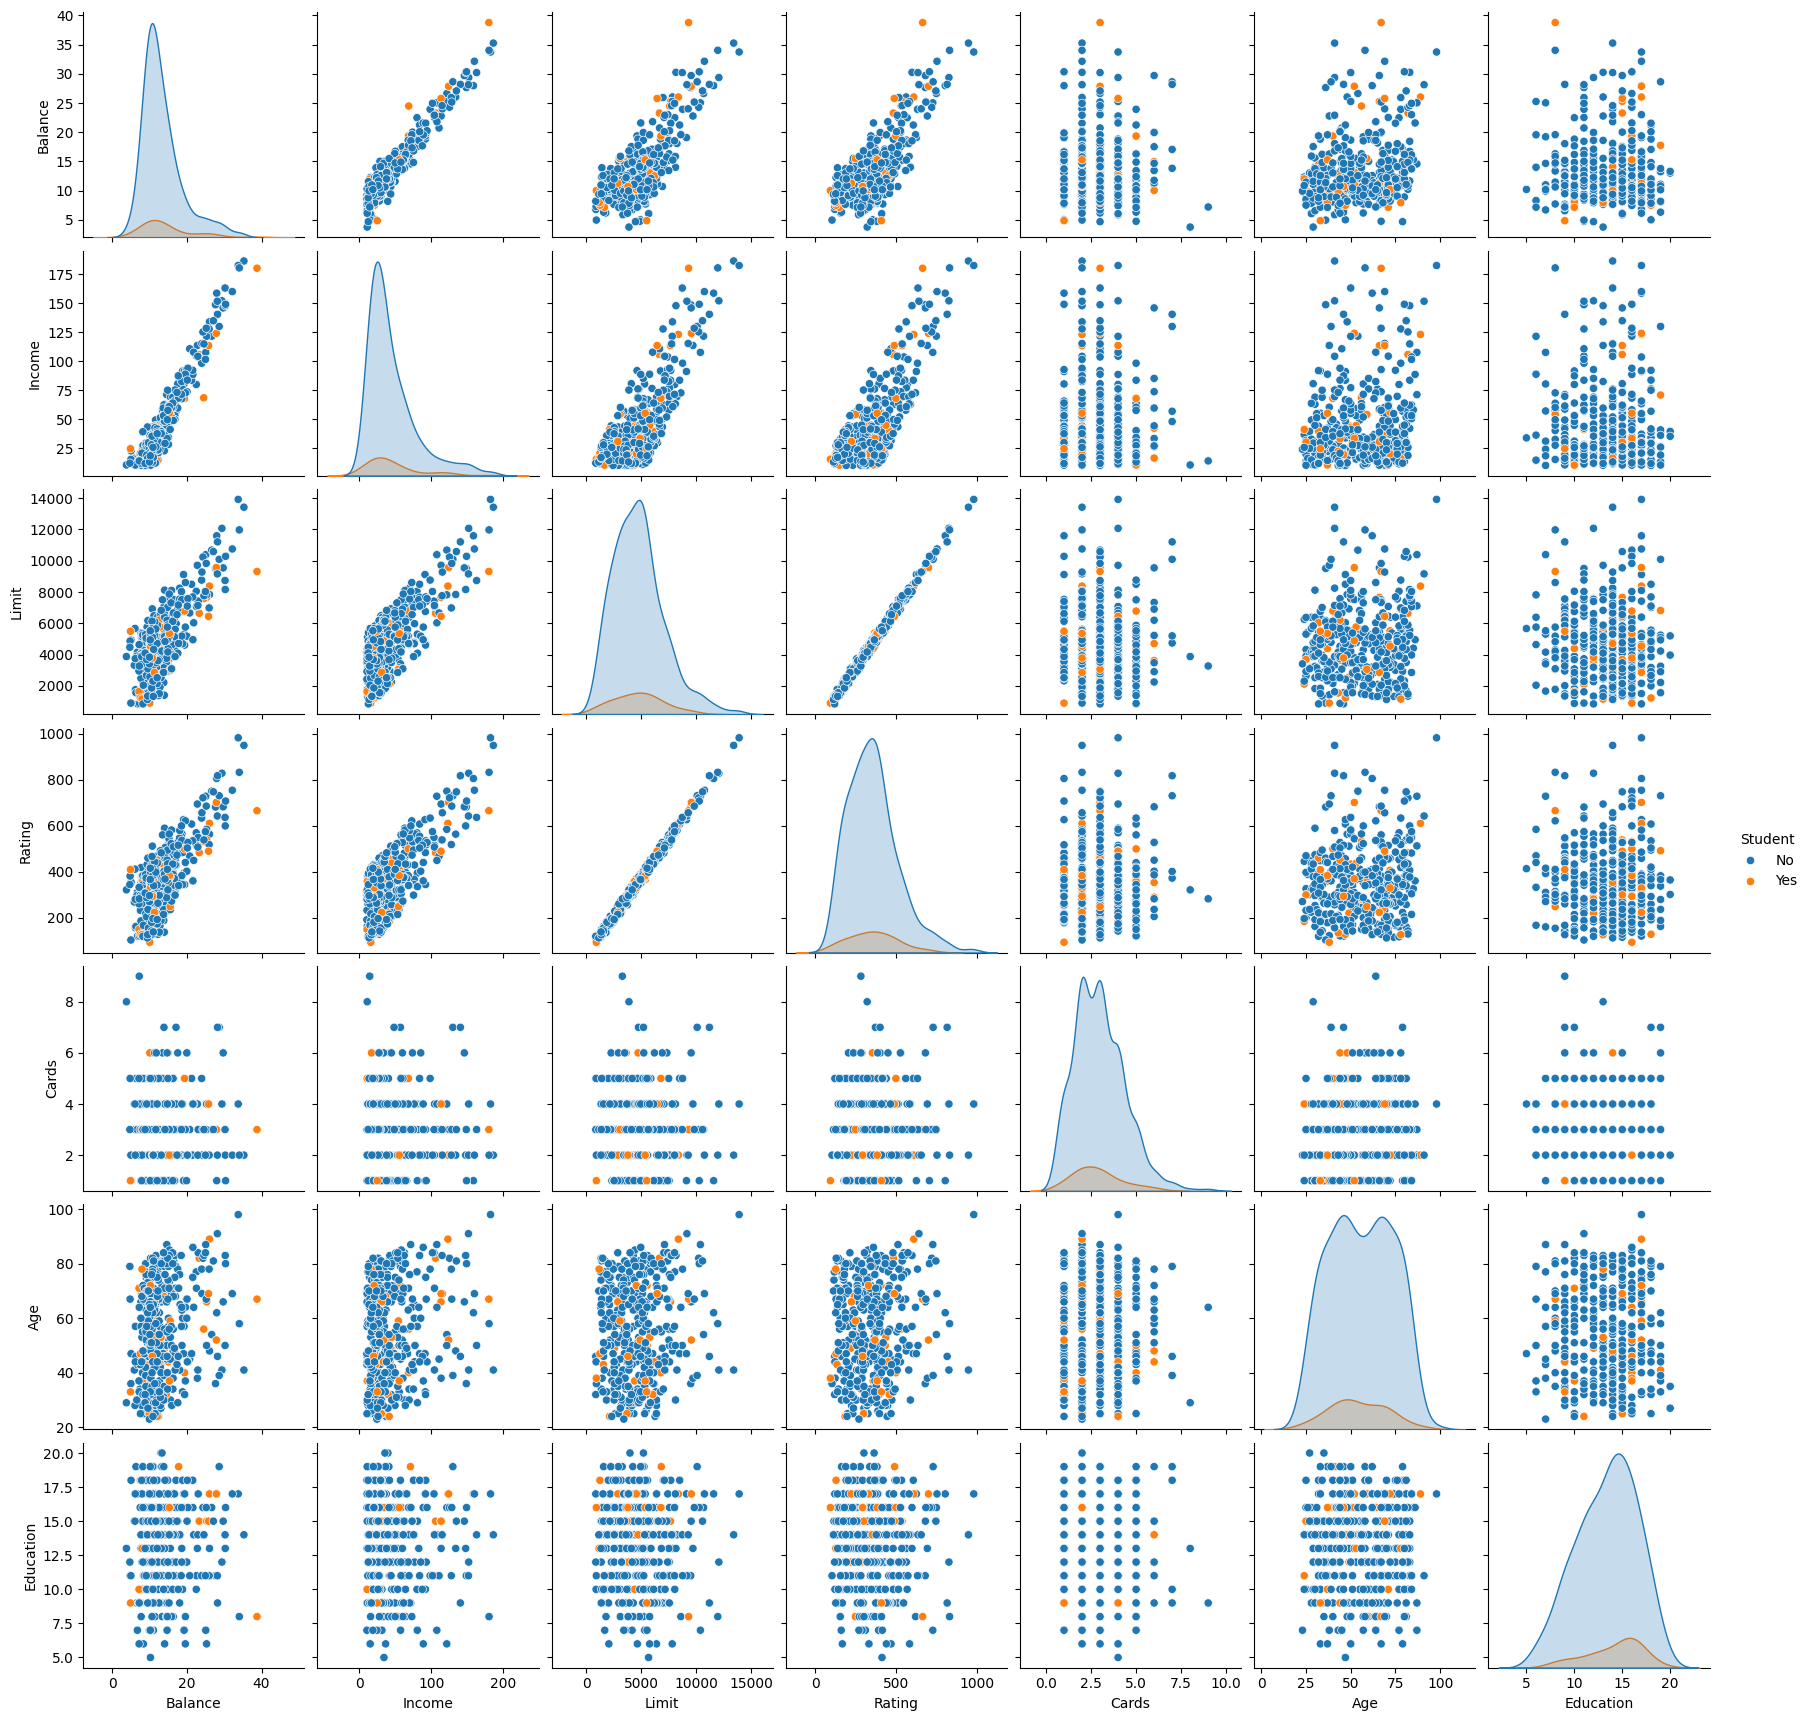

In [100]:
# Clean up and suppress the FutureWarning related to Seaborn, (future change in how Pandas will handle grouping with length-1 list-like objects)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    sns.pairplot(data=df, hue="Student")    # Create a pairplot matrix
plt.show()  # Show the pairplot matrix